In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('./data/cars_data0705.csv', index_col=0)
data

,ad_num,company,model,price,engine,year,hand,km,eng_kind,test,current_owner,prev_owner,color,gearbox,trader,area,sub_area,price_list,price0705
1,65146899.0,ג'יפ / Jeep,גרנד צ'ירוקי,140000.0,3604.0,2017,2,95000,7,05/2023,0.0,6.0,1,0.0,0,2,מודיעין מכבים רעות,159500.0,140000.0
2,73811682.0,ג'יפ / Jeep,רנגלר ארוך,268000.0,1995.0,2021,2,29000,7,03/2024,0.0,0.0,0,0.0,0,2,רמת גן,278100.0,-1.0
3,77276021.0,מיצובישי,אאוטלנדר PHEV,149000.0,2360.0,2020,2,74000,3,12/2023,0.0,0.0,0,0.0,0,2,פתח תקווה,155500.0,-1.0
4,55670284.0,שברולט,טרייל בלייזר,145000.0,1341.0,2022,1,17000,7,01/2024,0.0,0.0,1,0.0,0,2,רמלה,152100.0,126000.0
5,93516523.0,וולוו,XC60,250000.0,1969.0,2022,2,30000,7,01/2024,0.0,0.0,2,0.0,0,2,פתח תקווה,274700.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3384,61230592.0,מאזדה,3,15000.0,1598.0,2009,3,300000,7,10/2023,0.0,2.0,2,0.0,0,43,ירוחם,12700.0,17000.0
3385,96450445.0,טויוטה,אוריס הייבריד,62000.0,1798.0,2014,3,147000,7,11/2023,0.0,0.0,0,0.0,0,43,באר שבע,54900.0,60000.0
3386,87660871.0,פיאט,דובלו,58000.0,1598.0,2017,1,53500,6,09/2023,0.0,0.0,0,1.0,0,43,אופקים,-1.0,29000.0
3387,69065361.0,ג'יפ / Jeep,קומפאס,230000.0,1332.0,2022,1,7000,3,11/2023,0.0,0.0,1,0.0,0,43,אופקים,223900.0,220000.0


# Encode Company

output as a dictionary to save in the encoding json file.

and finaly, create an encoding column that will encode the car company column.

In [3]:
# create car list of companies
car_company_list = list(data.company.value_counts().to_dict().keys())
# create encoding dictionary
car_enc_dict = {}
for i in range(0, len(car_company_list)):
    car_enc_dict[car_company_list[i]] = i
# print the new encoding dict
print(car_enc_dict)

{'טויוטה': 0, 'יונדאי': 1, 'קיה': 2, 'סקודה': 3, 'מיצובישי': 4, 'ניסאן': 5, 'מאזדה': 6, 'מרצדס': 7, 'שברולט': 8, 'ב.מ.וו': 9, 'אאודי': 10, 'פורד': 11, 'סוזוקי': 12, 'פולקסווגן': 13, "פיג'ו": 14, 'סיאט': 15, "ג'יפ / Jeep": 16, 'הונדה': 17, 'סובארו': 18, 'רנו': 19, 'סיטרואן': 20, 'טסלה': 21, 'וולוו': 22, 'פיאט': 23, 'אופל': 24, 'לקסוס': 25, 'אלפא רומיאו': 26, 'לנד רובר': 27, "אם. ג'י. / MG": 28, "דאצ'יה": 29, 'איסוזו': 30, 'קאדילק': 31, 'פורשה': 32, 'קופרה': 33, 'סאנגיונג': 34, 'מיני': 35, 'דייהטסו': 36, 'אינפיניטי': 37, "ג'נסיס": 38, 'ביואיק': 39, 'האמר': 40, 'קרייזלר': 41, 'מזראטי': 42, "ג'ילי - Geely": 43, "צ'רי / Chery": 44, "ג'י.איי.סי/ GAC": 45, 'יגואר': 46, 'די.אס / DS': 47, 'איווייס': 48, "ג'י.אם.סי / GMC": 49, 'מאן': 50, 'סמארט': 51, "דודג'": 52, 'לינקולן': 53, 'מקסוס': 54, 'סקייוול': 55, "אברת'": 56}


In [4]:
#create new encoded column
data['enc_company'] = None

In [5]:
# encode the company col
for index, row in data.iterrows():
    data.at[index, ['enc_company']] = car_enc_dict[row.company]
data

,ad_num,company,model,price,engine,year,hand,km,eng_kind,test,current_owner,prev_owner,color,gearbox,trader,area,sub_area,price_list,price0705,enc_company
1,65146899.0,ג'יפ / Jeep,גרנד צ'ירוקי,140000.0,3604.0,2017,2,95000,7,05/2023,0.0,6.0,1,0.0,0,2,מודיעין מכבים רעות,159500.0,140000.0,16
2,73811682.0,ג'יפ / Jeep,רנגלר ארוך,268000.0,1995.0,2021,2,29000,7,03/2024,0.0,0.0,0,0.0,0,2,רמת גן,278100.0,-1.0,16
3,77276021.0,מיצובישי,אאוטלנדר PHEV,149000.0,2360.0,2020,2,74000,3,12/2023,0.0,0.0,0,0.0,0,2,פתח תקווה,155500.0,-1.0,4
4,55670284.0,שברולט,טרייל בלייזר,145000.0,1341.0,2022,1,17000,7,01/2024,0.0,0.0,1,0.0,0,2,רמלה,152100.0,126000.0,8
5,93516523.0,וולוו,XC60,250000.0,1969.0,2022,2,30000,7,01/2024,0.0,0.0,2,0.0,0,2,פתח תקווה,274700.0,250000.0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3384,61230592.0,מאזדה,3,15000.0,1598.0,2009,3,300000,7,10/2023,0.0,2.0,2,0.0,0,43,ירוחם,12700.0,17000.0,6
3385,96450445.0,טויוטה,אוריס הייבריד,62000.0,1798.0,2014,3,147000,7,11/2023,0.0,0.0,0,0.0,0,43,באר שבע,54900.0,60000.0,0
3386,87660871.0,פיאט,דובלו,58000.0,1598.0,2017,1,53500,6,09/2023,0.0,0.0,0,1.0,0,43,אופקים,-1.0,29000.0,23
3387,69065361.0,ג'יפ / Jeep,קומפאס,230000.0,1332.0,2022,1,7000,3,11/2023,0.0,0.0,1,0.0,0,43,אופקים,223900.0,220000.0,16


# Encode models

output as a dictionary to save in the encoding json file.

and finaly, create an encoding column that will encode the car model column.

In [6]:
# create model list of companies
car_model_list = list(data.model.value_counts().to_dict().keys())
# create encoding dictionary
model_enc_dict = {}
for i in range(0, len(car_model_list)):
    model_enc_dict[car_model_list[i]] = i
# print the new encoding dict
print(model_enc_dict)

{'אאוטלנדר': 0, 'טוסון': 1, "ספורטז'": 2, 'קשקאי': 3, 'קודיאק': 4, 'פיקנטו': 5, 'קורולה': 6, 'CX-5': 7, 'אקס טרייל': 8, "גרנד צ'ירוקי": 9, 'אוקטביה': 10, '3': 11, 'לנד קרוזר ארוך': 12, 'מודל 3': 13, '3008': 14, 'איביזה': 15, 'פורסטר': 16, 'i10': 17, 'RAV4 הייבריד': 18, 'ספארק': 19, 'C-HR': 20, 'Q3': 21, 'פוקוס': 22, 'קורולה הייבריד': 23, 'איוניק': 24, 'נירו הייבריד': 25, 'לאון': 26, 'סופרב (עד 2019)': 27, 'אקספלורר': 28, 'סדרה 5': 29, 'יאריס': 30, 'XV': 31, 'XC60': 32, 'טראוורס': 33, 'מיקרה': 34, 'A3': 35, 'ויטרה': 36, 'סונטה הייבריד': 37, 'מגאן גראנד קופה': 38, '5': 39, 'i20': 40, 'סיוויק סדאן החדשה': 41, 'i25': 42, 'פריוס': 43, 'גרנד ויטרה': 44, 'רנגלר ארוך': 45, "סיוויק האצ'בק החדשה": 46, "ג'ימני": 47, 'אקליפס קרוס': 48, 'X3': 49, 'לנד קרוזר קצר': 50, 'סנטה פה': 51, 'קאמרי': 52, 'סדרה 3': 53, 'גולף': 54, 'E-Class': 55, 'טיגואן': 56, 'X5': 57, 'אוריס הייבריד': 58, 'ברלינגו דור 2 (2008-2019)': 59, 'פאביה': 60, '500': 61, 'Q7': 62, 'i30CW': 63, "ג'טה": 64, 'קארוק': 65, 'GLE קופה': 66, 

In [7]:
#create new encoded column
data['enc_model'] = None

In [8]:
# encode the mode col
for index, row in data.iterrows():
    data.at[index, ['enc_model']] = model_enc_dict[row.model]
data

,ad_num,company,model,price,engine,year,hand,km,eng_kind,test,...,prev_owner,color,gearbox,trader,area,sub_area,price_list,price0705,enc_company,enc_model
1,65146899.0,ג'יפ / Jeep,גרנד צ'ירוקי,140000.0,3604.0,2017,2,95000,7,05/2023,...,6.0,1,0.0,0,2,מודיעין מכבים רעות,159500.0,140000.0,16,9
2,73811682.0,ג'יפ / Jeep,רנגלר ארוך,268000.0,1995.0,2021,2,29000,7,03/2024,...,0.0,0,0.0,0,2,רמת גן,278100.0,-1.0,16,45
3,77276021.0,מיצובישי,אאוטלנדר PHEV,149000.0,2360.0,2020,2,74000,3,12/2023,...,0.0,0,0.0,0,2,פתח תקווה,155500.0,-1.0,4,67
4,55670284.0,שברולט,טרייל בלייזר,145000.0,1341.0,2022,1,17000,7,01/2024,...,0.0,1,0.0,0,2,רמלה,152100.0,126000.0,8,189
5,93516523.0,וולוו,XC60,250000.0,1969.0,2022,2,30000,7,01/2024,...,0.0,2,0.0,0,2,פתח תקווה,274700.0,250000.0,22,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3384,61230592.0,מאזדה,3,15000.0,1598.0,2009,3,300000,7,10/2023,...,2.0,2,0.0,0,43,ירוחם,12700.0,17000.0,6,11
3385,96450445.0,טויוטה,אוריס הייבריד,62000.0,1798.0,2014,3,147000,7,11/2023,...,0.0,0,0.0,0,43,באר שבע,54900.0,60000.0,0,58
3386,87660871.0,פיאט,דובלו,58000.0,1598.0,2017,1,53500,6,09/2023,...,0.0,0,1.0,0,43,אופקים,-1.0,29000.0,23,138
3387,69065361.0,ג'יפ / Jeep,קומפאס,230000.0,1332.0,2022,1,7000,3,11/2023,...,0.0,1,0.0,0,43,אופקים,223900.0,220000.0,16,142


# Price handle

Text(0, 0.5, 'frequency')

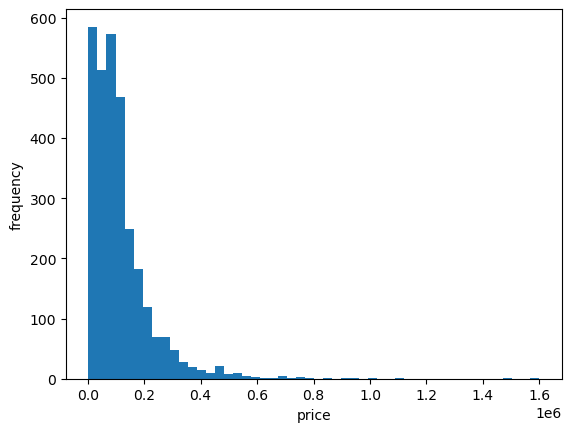

In [9]:
plt.hist(data.price, bins =50)
plt.xlabel('price')
plt.ylabel('frequency')

In [10]:
# wanted to use iqr on price but this is not a normal distribution so might delete relevant information
# insted we decided to cut all the prices above 400k assuming that it is to high and not representive data.
n_data = data[(data.price <= 400000)].copy()
n_data

,ad_num,company,model,price,engine,year,hand,km,eng_kind,test,...,prev_owner,color,gearbox,trader,area,sub_area,price_list,price0705,enc_company,enc_model
1,65146899.0,ג'יפ / Jeep,גרנד צ'ירוקי,140000.0,3604.0,2017,2,95000,7,05/2023,...,6.0,1,0.0,0,2,מודיעין מכבים רעות,159500.0,140000.0,16,9
2,73811682.0,ג'יפ / Jeep,רנגלר ארוך,268000.0,1995.0,2021,2,29000,7,03/2024,...,0.0,0,0.0,0,2,רמת גן,278100.0,-1.0,16,45
3,77276021.0,מיצובישי,אאוטלנדר PHEV,149000.0,2360.0,2020,2,74000,3,12/2023,...,0.0,0,0.0,0,2,פתח תקווה,155500.0,-1.0,4,67
4,55670284.0,שברולט,טרייל בלייזר,145000.0,1341.0,2022,1,17000,7,01/2024,...,0.0,1,0.0,0,2,רמלה,152100.0,126000.0,8,189
5,93516523.0,וולוו,XC60,250000.0,1969.0,2022,2,30000,7,01/2024,...,0.0,2,0.0,0,2,פתח תקווה,274700.0,250000.0,22,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3384,61230592.0,מאזדה,3,15000.0,1598.0,2009,3,300000,7,10/2023,...,2.0,2,0.0,0,43,ירוחם,12700.0,17000.0,6,11
3385,96450445.0,טויוטה,אוריס הייבריד,62000.0,1798.0,2014,3,147000,7,11/2023,...,0.0,0,0.0,0,43,באר שבע,54900.0,60000.0,0,58
3386,87660871.0,פיאט,דובלו,58000.0,1598.0,2017,1,53500,6,09/2023,...,0.0,0,1.0,0,43,אופקים,-1.0,29000.0,23,138
3387,69065361.0,ג'יפ / Jeep,קומפאס,230000.0,1332.0,2022,1,7000,3,11/2023,...,0.0,1,0.0,0,43,אופקים,223900.0,220000.0,16,142


Text(0, 0.5, 'frequency')

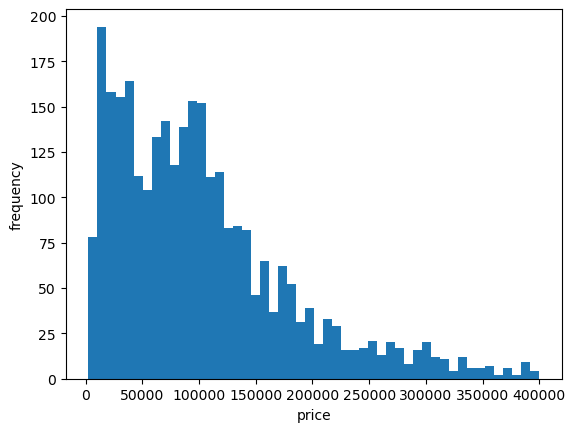

In [11]:
plt.hist(n_data.price, bins =50)
plt.xlabel('price')
plt.ylabel('frequency')

<AxesSubplot:xlabel='ad_num'>

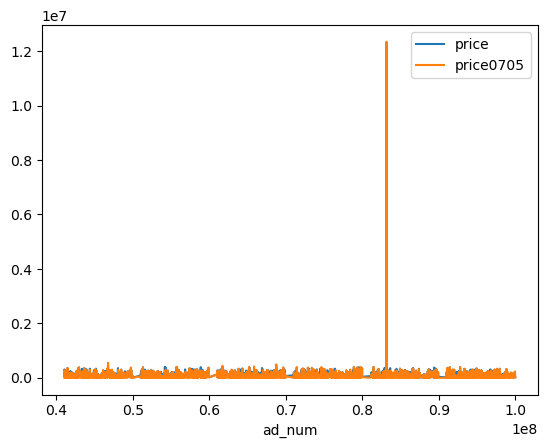

In [12]:
car_plot = n_data.groupby(['ad_num']).mean()[['price', 'price0705']]
car_plot.plot()

In [13]:
n_data[n_data.price0705 == n_data.price0705.max()]

,ad_num,company,model,price,engine,year,hand,km,eng_kind,test,...,prev_owner,color,gearbox,trader,area,sub_area,price_list,price0705,enc_company,enc_model
2672,83164746.0,טויוטה,C-HR,128000.0,1798.0,2019,1,45000,7,01/2024,...,1.0,2,0.0,0,41,אשדוד,124800.0,12345678.0,0,20


In [14]:
# found outlier in data_price, assuming that someone does not know how to delete ad, made an imposible price.
# cannot know if the car is saled or not.
# we will delete it.
n_data = n_data[n_data.price0705 != n_data.price0705.max()]

<AxesSubplot:xlabel='ad_num'>

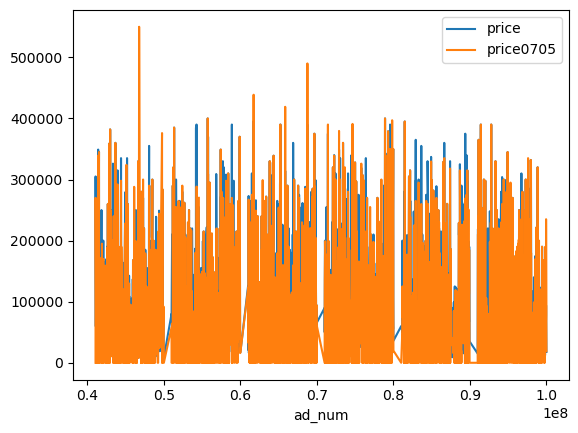

In [15]:
car_plot = n_data.groupby(['ad_num']).mean()[['price', 'price0705']]
car_plot.plot()

In [17]:
# export the clean data
n_data.to_csv('./data/clean_data_0705.csv')